In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Implementation of Support Vector Machine Baseline 

### Preparing Data

First step is to subset the restaurants from the entire yelp business data

In [3]:
path = '/Users/shafz/OneDrive/Documents/machine-learning-dse-i210-final-project-yelprestaurantrecommender/data/raw/'
business = pd.read_csv(path+'raw_business.csv')
restaurants = business[business.categories.fillna('-').str.lower().str.contains('restaurant')]

In [4]:
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


In [5]:
restaurants.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [6]:
restaurants.columns = ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'biz_stars', 'biz_review_count', 'is_open',
       'attributes', 'categories', 'hours']

restaurants = restaurants.drop(['name', 'address','state', 'postal_code',
       'latitude', 'longitude', 'is_open', 'attributes', 'hours'], axis = 1)

Next, we can look at the reviews data 

In [7]:
## loading csv file with all the reviews
reviews = pd.read_csv(path  + 'raw_reviews.csv')
reviews.drop('Unnamed: 0', axis =1, inplace = True)
#reviews.head(5)

In [8]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [8]:
reviews = reviews.drop(['useful', 'funny','cool','date'], axis = 1)

In [9]:
# combining reviews data with buisiness data 
merged_df = pd.merge(reviews, restaurants, on='business_id')
#merged_df.head(5)

Now we want to subset the data furthur to focus just on new orleans

In [10]:
# creating a subset datafarme with just restaurants in New Orleans and dropping columns which don't contain useful information
nola = merged_df.loc[merged_df['city']=='New Orleans']
nola = nola.drop('city', axis = 1)
nola.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,biz_stars,biz_review_count,categories
413,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
414,e-1HL9fQFAja1y5gyLUA3w,aG7fzKXqZuG-0vW6NFt8zA,e4Vwtrqf-wpJfwesgvdgxQ,5,0,0,0,This was my first time here and I will be comi...,2017-04-30 17:26:37,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
415,iGvDv7d44zf61iFrfz06wA,mUIww29FcFs5E67eZsMdvw,e4Vwtrqf-wpJfwesgvdgxQ,5,1,0,0,We ordered from Melt last night though Waitr. ...,2018-03-07 12:13:26,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
416,eJP8Tv3rKOQMNVj5p_a3iA,uzHh5QORBRg8PkO4yg4rIg,e4Vwtrqf-wpJfwesgvdgxQ,5,0,0,0,"Finally got to check out Melt, and it certainl...",2018-03-07 01:24:05,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
417,CuLAC1anY3h2a4w0Ic8jiQ,3bRv6h4oOu1lk7N0EEi4DA,e4Vwtrqf-wpJfwesgvdgxQ,5,0,0,0,"Cool vibe! the food is very good, we had the M...",2018-03-16 22:13:07,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."


In [11]:
## some users may have reviews the same restaurant twice and left the same rating which is not useful for our purposes 
nola.drop_duplicates(['user_id', 'business_id', 'stars'], keep='first', inplace=True)

We want to see if some users have rated the same restaurant more than once

In [11]:
nola_duplicated = nola.loc[nola.duplicated(['user_id', 'business_id'], keep = False)]
nola_duplicated.head(6)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,biz_stars,biz_review_count,categories
413,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
418,DK-hGw3XSTJHT26yjzeG3Q,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,0,0,0,Cute interior and owner (?) gave us tour of up...,2018-07-28 20:39:45,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
419,c-caXBb1n3yqMS2gqr6B3g,Vc83QXHTM-L27BR11ca_LQ,e4Vwtrqf-wpJfwesgvdgxQ,5,1,0,0,Fresh food and good atmosphere. Even the most ...,2017-01-31 18:06:07,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
426,YBdqOuJv1xs5PO8k8h3Emg,ixjYILSNOyK6AtrTQuUF_w,e4Vwtrqf-wpJfwesgvdgxQ,3,0,0,0,"The fried cheese curds were amazing! Actually,...",2018-03-11 00:26:13,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
432,Dn5_yi59tvODH2up3TilCA,Vc83QXHTM-L27BR11ca_LQ,e4Vwtrqf-wpJfwesgvdgxQ,1,1,0,0,Sad sad day for a once great eatery. 3 of our ...,2018-05-23 17:28:23,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
435,E23YWm4DJxZK7ek8dGAVMw,ixjYILSNOyK6AtrTQuUF_w,e4Vwtrqf-wpJfwesgvdgxQ,3,0,0,0,"The fried cheese curds were amazing! Actually,...",2017-10-30 04:13:00,4.0,32,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."


In [12]:
print('number of duplicated reviews: ', len(nola_duplicated))
print('number of unique reviews: ', len(nola_duplicated['user_id'].unique()))

number of duplicated reviews:  19638
number of unique reviews:  5892


There are a considerable amount of reviews (7683) that pertain to users who have visited a resturant more than once and left a review each time. To handle this, we are going to average the user reviews. Perhaps a weighted average with the most recent rating having a higher weight would lead to better results but we are just going to stick to the simpler method for this baseline.

In [13]:
avg_revs = nola_duplicated.groupby(by=['user_id', 'business_id']).mean()
avg_revs

stars  useful  funny  cool  \
user_id                business_id                                          
--XwFm4qERD6J5SX0JAsbg CQQHON44VFVqcCwsalwLQg    3.5     0.0    0.5   1.0   
-0LGLx8LP5dq3zcGO4Bebw eLjXnfYwkr8zz0VhwMhOGw    3.5     0.0    0.0   0.0   
-0Q9kNv6aGzDeLqTJVQOrg fKAxmycMFwO9qWVUAOQzOw    4.5     1.0    1.0   0.5   
-154QAmLwXOsKqChHSeWJQ jQNmnjrNd1tJXOg9bfB5hA    4.0     0.0    0.0   0.0   
-20Z6vzXTeJvru_PSkW7vw VQcCL9PiNL_wkGf-uF3fjg    1.0     0.0    0.0   0.0   
...                                              ...     ...    ...   ...   
zy0el7c-IO4BvjxUgj-ZSw EHhwVLuIIrq4somySU0m8A    2.0     0.5    0.0   0.5   
                       PVieWiYn8GK9GSLnNFmOyA    4.5     0.0    0.0   0.0   
zy7HqigeNvAU0TpDra-H9g FzHVtXe8-3fFclRBUI9YdA    4.0     0.0    0.0   0.0   
zyw-ZC8fB_5sLF5yN9R-xw QQng-ifjEZhI1Vb9j0Hb4A    5.0     0.0    0.0   0.0   
zz8cvJfqBDg4rFW4Ufk3eg tsaifr1x7MHWsUngvZ1SQA    5.0     0.5    0.0   0.0   

                                               biz_stars  biz_review_count  
user_id                business_id                                          
--XwFm4qERD6J5SX0JAsbg CQQHON44VFVqcCwsalwLQg        3.5             165.0  
-0LGLx8LP5dq3zcGO4Bebw eLjXnfYwkr8zz0VhwMhOGw        4.0             419.0  
-0Q9kNv6aGzDeLqTJVQOrg fKAxmycMFwO9qWVUAOQzOw        4.0             292.0  
-154QAmLwXOsKqChHSeWJQ jQNmnjrNd1tJXOg9bfB5hA        3.0             244.0  
-20Z6vzXTeJvru_PSkW7vw VQcCL9PiNL_wkGf-uF3fjg        4.0            5070.0  
...                                                  ...               ...  
zy0el7c-IO4BvjxUgj-ZSw EHhwVLuIIrq4somySU0m8A        4.0             226.0  
                       PVieWiYn8GK9GSLnNFmOyA        3.5             737.0  
zy7HqigeNvAU0TpDra-H9g FzHVtXe8-3fFclRBUI9YdA        3.5             228.0  
zyw-ZC8fB_5sLF5yN9R-xw QQng-ifjEZhI1Vb9j0Hb4A        4.0              75.0  
zz8cvJfqBDg4rFW4Ufk3eg tsaifr1x7MHWsUngvZ1SQA        3.5             339.0  

[9217 rows x 6 columns]

In [14]:
## dropping text and duplicated rows from dataframe and appending averaged reviews
nola_feats = nola.drop('text', axis = 1)
nola_feats = nola_feats.drop(nola_duplicated.index, axis = 0)
nola_feats = pd.concat([nola_feats, avg_revs])

Now lets take a look at the users data

In [15]:
users = pd.read_csv(path  + 'raw_users.csv')
users.head(5)


,Unnamed: 0,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",...,65,55,56,18,232,844,467,467,239,180
1,1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",...,13,10,17,3,66,96,119,119,35,18
3,3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",...,4,1,6,2,12,16,26,26,10,9
4,4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",...,1,0,0,0,1,1,0,0,0,0


It would be nice to be able to use the friends data as intuitively if the algorithm knows who is friends with who, it might learn to recommend restaurants that the friends rated highly. However, I imagine one hot encoding the friends would lead to a very high dimensional dataset so we are going to drop it for now along with the other irrelevant columns

In [16]:
users = users.drop(['Unnamed: 0', 'friends', 'yelping_since','useful', 'funny', 'cool', 'elite', 'compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos', 'fans', 'name'], axis = 1)

In [17]:
users.head(5)

,user_id,review_count,average_stars
0,qVc8ODYU5SZjKXVBgXdI7w,585,3.91
1,j14WgRoU_-2ZE1aw1dXrJg,4333,3.74
2,2WnXYQFK0hXEoTxPtV2zvg,665,3.32
3,SZDeASXq7o05mMNLshsdIA,224,4.27
4,hA5lMy-EnncsH4JoR-hFGQ,79,3.54


In [19]:
users.columns = ['user_id', 'user_review_count','user_average_stars']

In [18]:
# merging the users with the merged review and business data
nola_merged = pd.merge(nola_feats, users, on='user_id')

In [19]:
nola_merged.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,date,biz_stars,biz_review_count,categories,review_count,average_stars
0,e-1HL9fQFAja1y5gyLUA3w,aG7fzKXqZuG-0vW6NFt8zA,e4Vwtrqf-wpJfwesgvdgxQ,5.0,0.0,0.0,0.0,2017-04-30 17:26:37,4.0,32.0,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",97,4.34
1,y0TKqfAE0m6mjMJbGVp_BQ,aG7fzKXqZuG-0vW6NFt8zA,pym7c6ZFEtmoH16xN2ApBg,4.0,0.0,0.0,0.0,2016-06-16 01:08:51,4.5,1289.0,"Restaurants, Bars, Nightlife, American (Tradit...",97,4.34
2,D6GXu6Omd45iIBDStwTYsw,aG7fzKXqZuG-0vW6NFt8zA,UmjITdXHhEF46ho6IhaGQg,2.0,0.0,1.0,0.0,2017-09-03 15:42:23,2.0,351.0,"Adult Entertainment, Sports Bars, Restaurants,...",97,4.34


In [20]:
nola_merged['categories'].value_counts()

Cajun/Creole, Seafood, Restaurants                                                                       8523
Live/Raw Food, Seafood, Restaurants, Cajun/Creole                                                        7469
Restaurants, Seafood, Cajun/Creole, Breakfast & Brunch                                                   7289
Cajun/Creole, Restaurants                                                                                5174
Restaurants, American (Traditional), American (New), Cafes, Breakfast & Brunch                           5129
                                                                                                         ... 
Soul Food, Gas Stations, Automotive, Food, Restaurants                                                      4
Bars, Chicken Wings, Restaurants, Nightlife, Sports Bars, African, American (New)                           4
Bars, Steakhouses, Restaurants, Seafood, Nightlife, Food                                                    4
American (

In [21]:
nola_merged['user_id'].value_counts()

1HM81n6n4iPIFU5d2Lokhw    605
Xw7ZjaGfr0WNVt6s_5KZfA    575
E4BsVQnG5zetbwv2x8QIWg    438
0Igx-a1wAstiBDerGxXk2A    426
CfX4sTIFFNaRchNswqhVfg    327
                         ... 
_Tw7lNTrkiLMjyG44lzE7Q      1
8OlyP3h0prwuG7qGnpBl8w      1
JN05Z1KJ9rsVrjju0uqT9g      1
0BA7REJ07zoHdAJ6MjvaVQ      1
70MoovuLwYds3Gqw1PGrCA      1
Name: user_id, Length: 200645, dtype: int64

In [22]:
## I'm going to focus my analysis on users that have at least 100 reviews 
user_counts = nola_merged['user_id'].value_counts().to_dict()
user_list = []

for key in user_counts.keys(): 
    if user_counts[key] >= 100: 
        user_list.append(key)

In [23]:
filtered_nola = nola_merged[nola_merged['user_id'].isin(user_list)]
len(filtered_nola)

11214

Restricting the data to users who had more than 100 reviews greatly reduced the data size. Now lets one hot encode the categories column and see if it needs any cleaning


In [24]:
dummies = filtered_nola['categories'].str.get_dummies(sep=',')
dummies.head()

,Acai Bowls,Active Life,Adult Entertainment,African,American (New),American (Traditional),Apartments,Aquariums,Arcades,Art Galleries,...,Tiki Bars,Turkish,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Wedding Planning,Wholesale Stores,Wine Bars,Wineries
214,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


411 is a lot of columns to add on to our data. Maybe we can drop/consolidate some columns

In [25]:
## merging columns that have the same title but strings formatted differently 
## e.g. 'Active Life' vs ' Active Life' 

dummy_counts = dummies.sum().to_dict()
for key in dummy_counts.keys():

    key = key.strip()
    cols = dummies.filter(like=key).columns.tolist()
    #print(cols)

    if len(cols) > 1: 
        # create a new column with the maximum value between the selected columns using a lambda function
        new_col = dummies[cols].apply(lambda row: max(row), axis=1)
        #print(examp_df)
        # drop the selected columns
        dummies = dummies.drop(cols, axis=1)

        # add new column
        dummies[key] = new_col

columns = [col.strip() for col in dummies.columns]
dummies.columns = columns


In [29]:
random_categories = ['Apartments',
 'Arcades',
 'Art Galleries',
 'Boating',
 'Bowling',
 'Community Service/Non-Profit',
 'Convenience Stores',
 'Cooking Schools',
 'Country Clubs',
 'Dance Clubs',
 'Eatertainment',
 'Education',
 'Fitness & Instruction',
 'Fruits & Veggies',
 'Gift Shops',
 'Gyms',
 'Home Services',
 'Landmarks & Historical Buildings',
 'Local Services',
 'Mass Media',
 'Music Venues',
 'Musicians',
 'Party & Event Planning',
 'Photographers',
 'Pool Halls',
 'Real Estate',
#  'Resorts',
 'Social Clubs',
 'Souvenir Shops',
 'Specialty Schools',
 'Tobacco Shops',
 'Wholesale Stores',
 'Adult Entertainment',
 'Flowers & Gifts',
 'Personal Chefs',
 'Public Services & Government',
 'Active Life',
 'Arts & Entertainment',
 'Boat Charters',
 'Event Planning & Services',
 'Grocery',
 'Hotels',
 'Jazz & Blues',
 'Local Flavor',
 'Lounges',
 'Pubs',
 'Restaurants',
 'Shopping',
 'Tours',
 'Venues & Event Spaces',
 'Bar Crawl',
 'Karaoke',
 'Caterers',
 'Food',
 'Teppanyaki',
 'Furniture Stores',
 'Heating & Air Conditioning/HVAC',
 'Kitchen & Bath',
 'Pretzels', # tagged as other things 
 'Religious Organizations',
 'Restaurant Supplies',
 'Salvadoran', # tagged as other things 
#  'Travel Agents',
#  'Travel Services',
 'Wholesalers',
 'Yelp Events',
 'Appliances',
 'Cabaret',
 'Cultural Center',
 'Herbs & Spices',
 #'Nicaraguan', # tagged as other things 
 'Pop-up Shops',
 'Barbers',
 'Discount Store',
 'Drugstores',
 'Health & Medical',
 'Nutritionists',
 'Smokehouse', ## tagged as other things 
 'Aquariums',
 'Bike Repair/Maintenance',
 'Bikes',
 'Day Spas',
 'Fashion',
 'Hair Salons',
 'Performing Arts',
 'Skin Care',
 'Sports Wear',
 'Organic Stores',
 'Parks',
 'Professional Services',
 'Sporting Goods',
 'Golf',
 'Shared Office Spaces',
 'Beauty & Spas',
 'Cafeteria', # tagged as other things 
 'Swimming Pools',
 'Gas Stations',
 'Wedding Planning',
 'Nurseries & Gardening',
 'Party Supplies',
 'Health Markets',
 'Home & Garden']


In [30]:
dummies_filtered = dummies.drop(random_categories, axis = 1) # left with 179 columns 
dummy_counts = dummies_filtered.sum().to_dict()
#dummy_counts

In [31]:
def combineCols(names, col_list, df): 
    for name, cols in zip(names, col_list):
        
        # create a new column with the maximum value between the selected columns using a lambda function
        new_col = df[cols].apply(lambda row: max(row), axis=1)

        # drop the selected column
        df = df.drop(cols, axis=1)
        # add new column
        df[name] = new_col
    
    return df

In [32]:
categories_to_combine = [['Brewpubs', 'Distilleries', 'Wine & Spirits', 'Wine Tasting Room', 'Bars', 'Beer', 'Breweries', 'Wineries'], 
['Macarons', 'Patisserie/Cake Shop', 'Bakeries', 'Cupcakes', 'Custom Cakes'], ['Auction Houses', 'Farmers Market'], ['Delicatessen', 'Delis'],
['Coffee & Tea', 'Coffee Roasteries', 'Tea Rooms', 'Cafes'], ['Creperies', 'Waffles'], 
['Ice Cream & Frozen Yogurt',  'Shaved Ice',  'Shaved Snow', 'Gelato'], ['Middle Eastern', 'Moroccan', 'Persian/Iranian'], 
['Peruvian', 'Latin American', 'Honduran']]


titles = ['Alcohol', 'Bakeries', 'Markets', 'Delis', 'Coffee_and_Tea', 'Pancakes_and_Waffles', 'Frozen_Desserts', 'Middle Eastern', 'Latin American']

dummies_filtered = combineCols(titles, categories_to_combine, dummies_filtered)


In [33]:
to_drop = ['British', 'Malaysian', 'Egyptian', 'Polish', 'Russian', 'Ukrainian','Burmese','Arabic', 'Shanghainese', 
           'Argentine', 'Laotian','Acai Bowls','Arabic', 'Shanghainese','Haitian','Candy Stores','Szechuan','Venezuelan','Basque','Pasta Shops',
           'Empanadas', 'Fondue', 'Argentine', 'Pan Asian','Kebab','Lebanese','Pakistani','Colombian','Halal','Falafel']

dummies_filtered = dummies_filtered.drop(to_drop, axis = 1)

In [34]:
dummies_filtered.corr().unstack().sort_values(ascending=False).drop_duplicates()[1:50]

Hawaiian              Poke                      0.885423
Alcohol               Nightlife                 0.836775
Butcher               Meat Shops                0.667298
Middle Eastern        Mediterranean             0.588227
Pizza                 Italian                   0.452874
Mexican               Tacos                     0.438899
Middle Eastern        Greek                     0.428210
Cheesesteaks          Cheese Shops              0.388041
Ramen                 Japanese                  0.350244
Vegetarian            Vegan                     0.347673
Vietnamese            Bubble Tea                0.334671
Caribbean             Latin American            0.330968
Cuban                 Spanish                   0.330855
Seafood               Cajun/Creole              0.329905
Brasseries            German                    0.323125
Mediterranean         Greek                     0.307602
Kosher                Middle Eastern            0.303504
Modern European       Brasserie

In [35]:
high_corr = [['Meat Shops','Butcher'], ['Alcohol', 'Nightlife'], ['Hawaiian','Poke'],
             ['Brasseries','German'],['Middle Eastern', 'Mediterranean']]  

titles = ['Meat Shops', 'Alcohol/Nightlife', 'Hawiian/Poke', 'German' , 'Middle_East/Mediteranean']

dummies_filtered = combineCols(titles, high_corr, dummies_filtered)


In [36]:
dummy_counts = dummies_filtered.sum().to_dict()
dict(sorted(dummy_counts.items(), key=lambda item: item[1]))

{'Bed & Breakfast': 1,
 'Automotive': 6,
 'African': 11,
 'Taiwanese': 16,
 'Filipino': 20,
 'Wraps': 22,
 'Dim Sum': 22,
 'Korean': 22,
 'Ethiopian': 24,
 'Cheesesteaks': 26,
 'Festivals': 27,
 'Turkish': 27,
 'Fish & Chips': 33,
 'Buffets': 36,
 'Street Vendors': 36,
 'Kosher': 38,
 'Chicken Shop': 39,
 'Chocolatiers & Shops': 43,
 'Ramen': 50,
 'Markets': 50,
 'Hawiian/Poke': 52,
 'Cuban': 53,
 'Bubble Tea': 58,
 'Brazilian': 59,
 'Indian': 69,
 'Irish': 69,
 'Cheese Shops': 73,
 'Modern European': 73,
 'Pancakes_and_Waffles': 74,
 'Meat Shops': 76,
 'Greek': 84,
 'Spanish': 89,
 'Tex-Mex': 95,
 'Noodles': 98,
 'German': 118,
 'Hot Dogs': 120,
 'Bagels': 125,
 'Donuts': 130,
 'Frozen_Desserts': 150,
 'Tacos': 151,
 'Soup': 166,
 'Thai': 167,
 'Gluten-Free': 177,
 'Caribbean': 207,
 'Chicken Wings': 211,
 'Steakhouses': 244,
 'Chinese': 273,
 'Delis': 282,
 'Gastropubs': 285,
 'Diners': 297,
 'Latin American': 299,
 'Vegan': 319,
 'Barbeque': 347,
 'Vietnamese': 370,
 'Japanese': 395

In [37]:
dummies_filtered

,Automotive,Bed & Breakfast,Brazilian,Bubble Tea,Cheese Shops,Chocolatiers & Shops,Fish & Chips,Greek,Modern European,Taiwanese,...,Delis,Coffee_and_Tea,Pancakes_and_Waffles,Frozen_Desserts,Latin American,Meat Shops,Alcohol/Nightlife,Hawiian/Poke,German,Middle_East/Mediteranean
214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
217,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
218,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
124582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
124583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
124584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
nola_final = pd.concat([filtered_nola, dummies_filtered], axis = 1)
nola_final = nola_final.drop(['review_id','categories'], axis = 1)

I want to take out the automotive/gas station and bed & breakfast tagged businesses because those are not true restaurants 
We would not want to recommend someone a hotel if they are looking for a restaurant to eat at 

In [50]:
nola_final = nola_final[nola_final['Automotive'] != 1]
nola_final = nola_final[nola_final['Bed & Breakfast'] != 1]

nola_final = nola_final.drop(['Automotive', 'Bed & Breakfast'], axis = 1)
nola_final = nola_final.reset_index(drop=True)


In [41]:
mapping = {}
for user, val in zip(nola_final['user_id'].unique(),  np.arange(1, 78)):
    mapping[user] = val

mapped_user_id = [mapping[user] for user in nola_final['user_id']]
nola_final['mapped_user_id'] = mapped_user_id
nola_final

,user_id,business_id,stars,useful,funny,cool,date,biz_stars,biz_review_count,review_count,...,Coffee_and_Tea,Pancakes_and_Waffles,Frozen_Desserts,Latin American,Meat Shops,Alcohol/Nightlife,Hawiian/Poke,German,Middle_East/Mediteranean,mapped_user_id
0,iT1AA74QFn_a0Xq9-ggSGA,e4Vwtrqf-wpJfwesgvdgxQ,4.0,10.0,7.0,8.0,2018-01-26 16:20:32,4.0,32.0,2017,...,0,0,0,0,0,1,0,0,0,1
1,iT1AA74QFn_a0Xq9-ggSGA,GBTPC53ZrG1ZBY3DT8Mbcw,4.0,4.0,2.0,3.0,2010-08-01 17:16:46,4.0,4554.0,2017,...,0,0,0,0,0,1,0,1,0,1
2,iT1AA74QFn_a0Xq9-ggSGA,pym7c6ZFEtmoH16xN2ApBg,4.0,15.0,11.0,10.0,2018-11-16 16:08:09,4.5,1289.0,2017,...,0,0,0,0,0,1,0,0,0,1
3,iT1AA74QFn_a0Xq9-ggSGA,8uF-bhJFgT4Tn6DTb27viA,4.0,14.0,6.0,13.0,2013-10-22 13:58:22,4.5,2062.0,2017,...,1,0,0,0,0,0,0,0,0,1
4,iT1AA74QFn_a0Xq9-ggSGA,vN6v8m4DO45Z4pp8yxxF_w,4.0,10.0,3.0,7.0,2013-01-07 02:00:05,4.5,2084.0,2017,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11202,005GchcM1HWBH3SFKrIxBA,7JiyUwszN600WC1JWSlcTA,5.0,2.0,0.0,0.0,2015-10-04 21:00:06,4.5,166.0,420,...,0,0,0,0,0,1,0,0,0,70
11203,005GchcM1HWBH3SFKrIxBA,-A2OLubXDsMRPNN7LqohPA,5.0,11.0,3.0,7.0,2016-06-03 21:51:14,5.0,171.0,420,...,0,0,0,1,0,0,0,0,0,70
11204,005GchcM1HWBH3SFKrIxBA,wYdlP6g2y6gK_RmLrPhsGA,5.0,1.0,0.0,0.0,2013-12-09 00:45:01,4.0,376.0,420,...,0,0,0,0,0,1,0,0,0,70
11205,005GchcM1HWBH3SFKrIxBA,EmJF-xSIOaEEOWcK8UOBqg,5.0,13.0,3.0,6.0,2017-04-25 01:08:31,4.5,463.0,420,...,0,0,0,0,0,1,0,0,0,70


In [52]:
nola_final.columns

Index(['user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'date',
       'biz_stars', 'biz_review_count', 'review_count', 'average_stars',
       'Brazilian', 'Bubble Tea', 'Cheese Shops', 'Chocolatiers & Shops',
       'Fish & Chips', 'Greek', 'Modern European', 'Taiwanese', 'Wraps',
       'African', 'American (New)', 'American (Traditional)', 'Asian Fusion',
       'Bagels', 'Barbeque', 'Breakfast & Brunch', 'Buffets', 'Burgers',
       'Cajun/Creole', 'Caribbean', 'Cheesesteaks', 'Chicken Shop',
       'Chicken Wings', 'Chinese', 'Cuban', 'Desserts', 'Dim Sum', 'Diners',
       'Donuts', 'Ethiopian', 'Festivals', 'Filipino', 'French', 'Gastropubs',
       'Gluten-Free', 'Hot Dogs', 'Indian', 'Irish', 'Italian', 'Japanese',
       'Korean', 'Kosher', 'Mexican', 'Noodles', 'Pizza', 'Ramen', 'Salad',
       'Sandwiches', 'Seafood', 'Soup', 'Southern', 'Spanish', 'Steakhouses',
       'Street Vendors', 'Tacos', 'Tapas/Small Plates', 'Tex-Mex', 'Thai',
       'Turkish', 'Vega

Creating a binary version of nola_final

In [42]:
binary_stars = [5 if x > 3 else 1 if x < 3 else x for x in nola_final['stars']]
binary_nola = nola_final.drop('stars', axis = 1)
binary_nola['stars'] = binary_stars

In [43]:
len(binary_nola)

11207

In [44]:
nola_final['stars'].value_counts()

4.0    4638
5.0    2784
3.0    2592
2.0     902
1.0     291
Name: stars, dtype: int64

In [45]:
binary_nola['stars'].value_counts()

5.0    7422
3.0    2592
1.0    1193
Name: stars, dtype: int64

### Support Vector Machine 


In [46]:
from sklearn import svm 
from sklearn.model_selection import GroupShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report # classification_report(y_true, y_pred) 

### 

In [47]:
def trainModel(data):

    X = data.drop(['mapped_user_id', 'user_id', 'business_id', 'stars'], axis = 1)
    y = data['stars']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

    print('train size: ', len(X_train))
    print('val size: ', len(X_val))
    print('test size: ', len(X_test))

    model = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf'))
    model.fit(X_train, y_train)
    print('------ Performance on Train Set ------------')
    print(classification_report(y_train, model.predict(X_train)))

    print('------ Performance on Validation Set ------------')
    print(classification_report(y_val, model.predict(X_val)))
    

Lets first try training the SVM on all of the original data with 5 output classes. We evaluate on the validation set 

In [48]:
trainModel(nola_final)

train size:  7844
val size:  2242
test size:  3363


ValueError: could not convert string to float: '2015-11-01 00:02:45'

In [ ]:
nola_final.head()

,user_id,business_id,stars,biz_stars,biz_review_count,user_review_count,user_average_stars,Brazilian,Bubble Tea,Cheese Shops,...,Coffee_and_Tea,Pancakes_and_Waffles,Frozen_Desserts,Latin American,Meat Shops,Alcohol/Nightlife,Hawiian/Poke,German,Middle_East/Mediteranean,mapped_user_id
0,iT1AA74QFn_a0Xq9-ggSGA,e4Vwtrqf-wpJfwesgvdgxQ,4.0,4.0,32.0,2017,3.72,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,iT1AA74QFn_a0Xq9-ggSGA,GBTPC53ZrG1ZBY3DT8Mbcw,4.0,4.0,4554.0,2017,3.72,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,iT1AA74QFn_a0Xq9-ggSGA,pym7c6ZFEtmoH16xN2ApBg,4.0,4.5,1289.0,2017,3.72,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,iT1AA74QFn_a0Xq9-ggSGA,8uF-bhJFgT4Tn6DTb27viA,4.0,4.5,2062.0,2017,3.72,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,iT1AA74QFn_a0Xq9-ggSGA,vN6v8m4DO45Z4pp8yxxF_w,4.0,4.5,2084.0,2017,3.72,0,0,0,...,1,0,0,0,0,1,0,0,0,1


We have an F1-score of 0 for 1 star classification on the validation set which is really bad.
Lets see if we can improve performance by focusing on three classes instead of all 5, namely, [1 star 3 star and 5 star]

In [ ]:
trainModel(binary_nola)

train size:  8620
val size:  2463
test size:  3695
------ Performance on Train Set ------------
              precision    recall  f1-score   support

         1.0       0.89      0.03      0.06       848
         3.0       0.60      0.18      0.27      1964
         5.0       0.71      0.99      0.83      5808

    accuracy                           0.71      8620
   macro avg       0.73      0.40      0.39      8620
weighted avg       0.70      0.71      0.62      8620

------ Performance on Validation Set ------------
              precision    recall  f1-score   support

         1.0       0.75      0.01      0.02       261
         3.0       0.49      0.15      0.22       524
         5.0       0.71      0.98      0.83      1678

    accuracy                           0.70      2463
   macro avg       0.65      0.38      0.36      2463
weighted avg       0.67      0.70      0.61      2463



Using 3 classes (1 star, 3 star, 5 star) has much better performance than using 5 classes but the f1 score for 1 star is still very low. We can see from the classification reports that overfitting is not a problem. Perhaps we should try to balance classes to see if we can improve F1-score

### Attempt to Balance Classes

We are going to use the SMOTE package from imblearn to create samples for the minor classes and balance the data 

In [ ]:
from imblearn.over_sampling import SMOTE
# generates synthetic samples for the minority class based on its nearest neighbors in the feature space.

smote = SMOTE(random_state=42)

def applySMOTE(data):

    X = data.drop(['mapped_user_id', 'user_id', 'business_id', 'stars'], axis = 1)
    y = data['stars']
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print(y_resampled.value_counts())

    X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

    print('train size: ', len(X_train))
    print('val size: ', len(X_val))
    print('test size: ', len(X_test))

    model = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf'))
    model.fit(X_train, y_train)

    print('------ Performance on Train Set ------------')
    print(classification_report(y_train, model.predict(X_train)))

    print('------ Performance on Validation Set ------------')
    print(classification_report(y_val, model.predict(X_val)))

In [ ]:
applySMOTE(nola_final)

4.0    5029
3.0    5029
5.0    5029
2.0    5029
1.0    5029
Name: stars, dtype: int64
train size:  17601
val size:  5029
test size:  7544
------ Performance on Train Set ------------
              precision    recall  f1-score   support

         1.0       0.56      0.62      0.59      3530
         2.0       0.41      0.41      0.41      3482
         3.0       0.46      0.23      0.31      3551
         4.0       0.48      0.71      0.57      3517
         5.0       0.59      0.54      0.57      3521

    accuracy                           0.50     17601
   macro avg       0.50      0.50      0.49     17601
weighted avg       0.50      0.50      0.49     17601

------ Performance on Validation Set ------------
              precision    recall  f1-score   support

         1.0       0.53      0.59      0.56       981
         2.0       0.41      0.40      0.41      1023
         3.0       0.41      0.20      0.27      1022
         4.0       0.44      0.65      0.52      1020
       

In [ ]:
applySMOTE(binary_nola)

5.0    8326
3.0    8326
1.0    8326
Name: stars, dtype: int64
train size:  17484
val size:  4996
test size:  7494
------ Performance on Train Set ------------
              precision    recall  f1-score   support

         1.0       0.65      0.66      0.66      5829
         3.0       0.58      0.41      0.48      5828
         5.0       0.70      0.88      0.78      5827

    accuracy                           0.65     17484
   macro avg       0.64      0.65      0.64     17484
weighted avg       0.64      0.65      0.64     17484

------ Performance on Validation Set ------------
              precision    recall  f1-score   support

         1.0       0.62      0.61      0.62      1657
         3.0       0.56      0.40      0.47      1662
         5.0       0.68      0.88      0.76      1677

    accuracy                           0.63      4996
   macro avg       0.62      0.63      0.62      4996
weighted avg       0.62      0.63      0.62      4996



Using SMOTE to balance classes didn't improve accuracy much but f1-scores improved greatly. As we want a robust model that can predict all classes well rather than a model that has high accuracy but skewed performance, we choose the model trained on SMOTE balanced binary data as our baseline. Now lets try a random grid search to see if we can improve performance further
 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

X = binary_nola.drop(['mapped_user_id', 'user_id', 'business_id', 'stars'], axis = 1)
y = binary_nola['stars']
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

print('train size: ', len(X_train))
print('val size: ', len(X_val))
print('test size: ', len(X_test))

svc = svm.SVC()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

distributions = dict(C=uniform(loc=1, scale=4),kernel=['rbf', 'linear', 'poly', 'sigmoid'], degree=[1, 2, 3, 4, 5],
                     gamma=['scale','auto'])
clf = RandomizedSearchCV(svc, distributions, random_state=42)
search = clf.fit(X_train, y_train)

search.best_params_

train size:  17484
val size:  4996
test size:  7494


{'C': 2.216968971838151, 'degree': 5, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:

print('------ Performance on Train Set ------------')
print(classification_report(y_train, clf.predict(X_train)))

print('------ Performance on Validation Set ------------')
print(classification_report(y_val, clf.predict(X_val)))

------ Performance on Train Set ------------
              precision    recall  f1-score   support

         1.0       0.66      0.68      0.67      5829
         3.0       0.59      0.43      0.50      5828
         5.0       0.71      0.88      0.79      5827

    accuracy                           0.66     17484
   macro avg       0.65      0.66      0.65     17484
weighted avg       0.65      0.66      0.65     17484

------ Performance on Validation Set ------------
              precision    recall  f1-score   support

         1.0       0.63      0.62      0.62      1657
         3.0       0.56      0.41      0.47      1662
         5.0       0.69      0.87      0.77      1677

    accuracy                           0.63      4996
   macro avg       0.62      0.63      0.62      4996
weighted avg       0.62      0.63      0.62      4996



Using grid search didn't make a difference in terms of performance? Lets retrain the model and evaluate on the test set

In [ ]:
X = binary_nola.drop(['mapped_user_id', 'user_id', 'business_id', 'stars'], axis = 1)
y = binary_nola['stars']
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

print('train size: ', len(X_train))
print('val size: ', len(X_val))
print('test size: ', len(X_test))

model = make_pipeline(StandardScaler(), 
                      svm.SVC(C = 2, degree = 5, gamma ='auto', kernel = 'rbf'))
model.fit(X_train, y_train)

print('------ Performance on Train Set ------------')
print(classification_report(y_train, model.predict(X_train)))

print('------ Performance on Validation Set ------------')
print(classification_report(y_val, model.predict(X_val)))

print('------ Performance on Test Set ------------')
print(classification_report(y_test, model.predict(X_test)))

5.0    8326
3.0    8326
1.0    8326
Name: stars, dtype: int64
train size:  17484
val size:  4996
test size:  7494
------ Performance on Train Set ------------
              precision    recall  f1-score   support

         1.0       0.65      0.67      0.66      5829
         3.0       0.59      0.43      0.50      5828
         5.0       0.71      0.88      0.79      5827

    accuracy                           0.66     17484
   macro avg       0.65      0.66      0.65     17484
weighted avg       0.65      0.66      0.65     17484

------ Performance on Validation Set ------------
              precision    recall  f1-score   support

         1.0       0.62      0.62      0.62      1657
         3.0       0.56      0.41      0.47      1662
         5.0       0.69      0.87      0.77      1677

    accuracy                           0.63      4996
   macro avg       0.62      0.63      0.62      4996
weighted avg       0.62      0.63      0.62      4996

------ Performance on Test Se

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

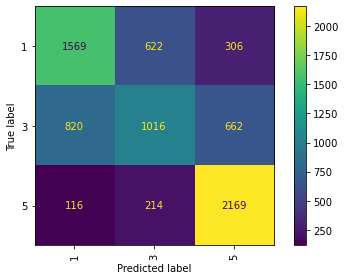

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, display_labels=['1','3','5'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

### MISC NOTES

In [ ]:
to_check = ['British', 'Malaysian', 'Egyptian', 'Polish', 'Russian', 'Ukrainian','Burmese','Acai Bowls','Arabic','Persian/Iranian',
'Shanghainese','Haitian','Candy Stores','Szechuan','Honduran','Venezuelan','Basque','Pasta Shops','Empanadas', 'Fondue', 'African',
'Argentine', 'Moroccan', 'Pan Asian','Kebab','Laotian','Peruvian','Taiwanese','Filipino','Wraps','Korean','Cheesesteaks','Lebanese',
'Festivals','Pakistani','Turkish','Colombian','Dim Sum','Ethiopian','Halal','Falafel','Buffets','Street Vendors','Fish & Chips',
'Kosher','Poke','Chicken Shop','German']

def getCatList(cat, df):
    list_of_cats = df['categories'].iloc[0].split(',')
    if len(list_of_cats) > 1: 
        print('{} can be dropped'.format(cat))
        print(list_of_cats)
    else: 
        print('{} is the one tag'.format(cat))

for cat in to_check: 
    cat_df = nola_merged[nola_merged.categories.fillna('-').str.contains(cat)]
    if len(cat_df['business_id'].unique()) > 1: 
        print('{} has more than one unique business'.format(cat))
    else: 
        getCatList(cat, cat_df)

British can be dropped
['Gastropubs', ' British', ' Restaurants', ' Breakfast & Brunch', ' Bars', ' Nightlife', ' Southern', ' American (New)', ' Cocktail Bars']
Malaysian can be dropped
['Burmese', ' Malaysian', ' Restaurants']
Egyptian can be dropped
['Mediterranean', ' Restaurants', ' Egyptian', ' Middle Eastern']
Polish can be dropped
['Specialty Food', ' Polish', ' Modern European', ' Ukrainian', ' Food', ' Restaurants', ' Ethnic Food', ' Russian', ' American (New)']
Russian can be dropped
['Specialty Food', ' Polish', ' Modern European', ' Ukrainian', ' Food', ' Restaurants', ' Ethnic Food', ' Russian', ' American (New)']
Ukrainian can be dropped
['Specialty Food', ' Polish', ' Modern European', ' Ukrainian', ' Food', ' Restaurants', ' Ethnic Food', ' Russian', ' American (New)']
Burmese has more than one unique business
Acai Bowls has more than one unique business
Arabic can be dropped
['Arabic', ' Mediterranean', ' Restaurants', ' Greek', ' Lebanese', ' Middle Eastern']
Persian

In [ ]:
to_check = ['Burmese','Acai Bowls',
            'Haitian','Candy Stores','Szechuan','Honduran','Venezuelan','Basque','Pasta Shops','Empanadas', 'Fondue', 'African',
            'Pan Asian','Kebab','Peruvian','Taiwanese','Filipino','Wraps','Korean','Cheesesteaks','Lebanese',
            'Festivals','Pakistani','Turkish','Colombian','Dim Sum','Ethiopian','Halal','Falafel','Buffets','Street Vendors','Fish & Chips',
            'Kosher','Poke','Chicken Shop','German']

for cat in to_check: 
    print('Category: {}'.format(cat))
    cat_df = nola_merged[nola_merged.categories.fillna('-').str.contains(cat)]
    groups = cat_df.groupby(by='business_id')
    cat_dict = {}
    for name, group in groups: 
        #print('Checking business {}'.format(name))
        list_of_cats = group['categories'].iloc[0].split(',')
        if len(list_of_cats) > 1:
            #print(list_of_cats)
            for cat in list_of_cats:
                cat = cat.strip()
                if cat in cat_dict:
                    cat_dict[cat] += 1 
                else:
                    cat_dict[cat] = 1 
            sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda item: item[1], reverse = True))
        else: 
            print('{} is the one tag'.format(cat))
    print(sorted_cat_dict)

Category: Burmese
{'Burmese': 2, 'Restaurants': 2, 'Malaysian': 1, 'Vegetarian': 1, 'Specialty Food': 1, 'Ethnic Food': 1, 'Coffee & Tea': 1, 'Food': 1}
Category: Acai Bowls
{'Vegan': 3, 'Acai Bowls': 3, 'Juice Bars & Smoothies': 3, 'Food': 3, 'Restaurants': 3, 'Coffee & Tea': 1, 'Health & Medical': 1, 'Salad': 1, 'Herbal Shops': 1, 'Health Markets': 1, 'Specialty Food': 1}
Category: Haitian
{'Haitian': 2, 'Restaurants': 2, 'Caribbean': 2, 'Vietnamese': 1, 'Gluten-Free': 1, 'Cajun/Creole': 1}
Category: Candy Stores
{'Restaurants': 4, 'Specialty Food': 4, 'Food': 4, 'Candy Stores': 4, 'Cajun/Creole': 2, 'Hot Dogs': 1, 'Patisserie/Cake Shop': 1, 'Bakeries': 1, 'Custom Cakes': 1, 'Seafood': 1, 'Coffee & Tea': 1, 'Soul Food': 1, 'Bagels': 1, 'Delis': 1, 'Cheese Shops': 1, 'Grocery': 1, 'Desserts': 1, 'Delicatessen': 1}
Category: Szechuan
{'Restaurants': 2, 'Szechuan': 2, 'Chinese': 2, 'Dim Sum': 1, 'Pop-Up Restaurants': 1, 'Taiwanese': 1, 'Vegan': 1, 'Noodles': 1, 'Latin American': 1, 'Veg

In [ ]:
nola_merged[nola_merged.categories.fillna('-').str.lower().str.contains('restaurant')]

,review_id,user_id,business_id,stars,biz_stars,biz_review_count,categories,user_review_count,user_average_stars
0,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,4.0,32.0,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ...",126,2.97
1,-1qzkGPhIHdmlJgTOb0pNg,bcjbaE6dDog4jkNY91ncLQ,pym7c6ZFEtmoH16xN2ApBg,5.0,4.5,1289.0,"Restaurants, Bars, Nightlife, American (Tradit...",126,2.97
2,EgGMJejqejMMeVM4jZiISg,bcjbaE6dDog4jkNY91ncLQ,4WdDY97x4GdMYtyk1KQMnw,5.0,4.5,777.0,"Cafes, American (Traditional), Vietnamese, Res...",126,2.97
3,F5RgL_m7MFL983znFx-t1g,bcjbaE6dDog4jkNY91ncLQ,q4aAaxdN4wmUZoC6sKEwsw,4.0,4.5,192.0,"Cocktail Bars, Cajun/Creole, Seafood, Bars, Re...",126,2.97
4,9g7ZlTdO3UYqefV72wD4sw,bcjbaE6dDog4jkNY91ncLQ,D73evJ9PZKxO3E5TaThe3w,2.0,3.0,510.0,"Tex-Mex, Mexican, Restaurants",126,2.97
...,...,...,...,...,...,...,...,...,...
462236,AXPesOqoQni8oDSgDNCI2A,mAiK1JCD-Q9Xsxl9zLOzaw,gWKOrelk92IMrWvS_iFcqg,5.0,4.5,16.0,"Caribbean, Restaurants",4,5.00
462237,RuGBeROcybkAXIlpGcmvCw,WhQbQ5kVONPzjXG-2JNu0g,r5sIxismsox0XCKuhH2Q1Q,5.0,5.0,5.0,"Restaurants, Cajun/Creole, Seafood",4,5.00
462238,IXht3NOVKgJJna1ZRAlGew,ZEsW3Du24NxksT4emFaccw,r5sIxismsox0XCKuhH2Q1Q,5.0,5.0,5.0,"Restaurants, Cajun/Creole, Seafood",8,3.30
462239,-eVgCXn_FqxuLe69ZV01CA,3sCcTg15Xsnp3bOJfQM2Cg,sMj1D3dovgXK_oyi4kpYCA,1.0,2.0,5.0,"Restaurants, Fast Food, Breakfast & Brunch, Me...",1,1.00


In [ ]:
['Wholesale Stores', 'Wedding Planning', 'Venues & Event Spaces', 'Tours', 'Souvenir Shops', 'Real Estate', 'Restaurants', 'Public Services & Government', 
 'Music Venues','Local Services', 'Jazz & Blues', 'Health & Medical', 'Grocery', 'Golf', 'Gas Stations', 'Fruits & Veggies', 'Flowers & Gifts',
 'Event Planning & Services', 'Festivals', 'Convenience Stores', 'Cafeteria', ' Indoor Playcentre', 'Adult', 'Bike Repair/Maintenance', 'Caterers', 
  'Butcher', 'Sports Wear', 'Active Life',  'Beauty & Spas', 'Boat Charters', 'Books', 'Arts & Entertainment', 'Yelp Events', 'Appliances', 
  'Cabaret', 'Cards & Stationery', 'Cultural Center',  'Tobacco Shops', 'Travel Agents', 'Travel Services',
  'Shared Office Spaces',
 'Skin Care',
 'Social Clubs',
 'Specialty Schools',
 'Sporting Goods',
 'Supernatural Readings',
 'Swimming Pools',
 'Performing Arts',
 'Photographers',
 'Pool Halls',
 'Popcorn Shops',
 'Professional Services',
 'Religious Organizations',
 'Resorts',
 'Restaurant Supplies',
 'Mass Media',
 'Music & Video',
 'Musicians',
 'Nurseries & Gardening',
 'Nutritionists',
 'Parks',
 'Party & Event Planning',
 'Party Supplies',
 'Electronics Repair',
 'Fitness & Instruction',
 'Furniture Stores',
 'Gift Shops',
 'Gyms',
 'Hair Salons',
 'Heating & Air Conditioning/HVAC',
 'Herbal Shops',
 'Holiday Decorations',
 'Home & Garden',
 'Home Decor',
 'Home Services',
 'Indoor Playcentre',
 'Karaoke',
 'Kids Activities',
 'Kitchen & Bath',
 'Landmarks & Historical Buildings',
 'Farmers Market',
 'Country Clubs': 570,
 'Custom Cakes': 95,
 'Dance Clubs': 753,
 'Day Spas': 66,
 'Delicatessen': 124,
 'Discount Store': 22,
 'Distilleries': 669,
 'Drugstores': 19,
 'Eatertainment': 361,
 'Education': 831,
 'Egyptian': 70,
 'Electronics Repair': 13,]

SyntaxError: invalid syntax (<ipython-input-58-33f85020ad8f>, line 47)